### Regressâo linear: y = b1*Garantia + b2*peso+ b3*memoria+ b4*fonte w + b5*boostclock

In [253]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import os
import csv
import matplotlib.pyplot as plt

### importando o csv

In [229]:
pdva = pd.read_csv('dadospararegressao.csv', names=['preço pix', 'Garantia', 'peso', 'memoria', 'fonte w', 'boostclock'], skiprows=1)

In [254]:
pdva

,preço pix,Garantia,peso,memoria,fonte w,boostclock
0,2599.99,36.0,3000.0,8.0,550.0,2535.0
1,2399.99,36.0,3110.0,8.0,550.0,2565.0
2,2499.99,36.0,2567.0,8.0,450.0,2550.0
3,2399.99,36.0,1948.0,8.0,450.0,2475.0
4,2399.99,12.0,1441.0,8.0,450.0,2475.0
...,...,...,...,...,...,...
356,1861.13,12.0,1877.0,28.0,400.0,5133.0
357,487.35,3.0,640.0,4.0,400.0,900.0
358,1199.00,3.0,1700.0,4.0,400.0,900.0
359,2495.59,12.0,2000.0,12.0,550.0,1837.0


In [256]:
pdva.columns

Index(['preço pix', 'Garantia', 'peso', 'memoria', 'fonte w', 'boostclock'], dtype='object')

In [273]:
Y = pdva['preço pix']
X = pdva[['Garantia', 'peso', 'memoria', 'fonte w', 'boostclock']]


In [275]:
pdva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   preço pix   361 non-null    float64
 1   Garantia    361 non-null    float64
 2   peso        361 non-null    float64
 3   memoria     361 non-null    float64
 4   fonte w     361 non-null    float64
 5   boostclock  361 non-null    float64
dtypes: float64(6)
memory usage: 17.1 KB


In [276]:
est = sm.OLS(Y, X).fit()


In [277]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              preço pix   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              432.4
Date:                Tue, 11 Jul 2023   Prob (F-statistic):                   2.03e-135
Time:                        14:48:24   Log-Likelihood:                         -3210.1
No. Observations:                 361   AIC:                                      6428.
Df Residuals:                     357   BIC:                                      6444.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Garantia       9.1254      8.291      1.101      0.272      -7.180      25.431
peso           0.8946      0.107      8.342      0.000       0.684       1.105
memoria      233.7833     19.875     11.763      0.000     194.696     272.870
boostclock    -0.1154      0.081     -1.423      0.156      -0.275       0.044
==============================================================================
Omnibus:                       20.284   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.580
Skew:                           0.444   Prob(JB):                     1.03e-06
Kurtosis:                       4.022   Cond. No.                         583.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'memoria')

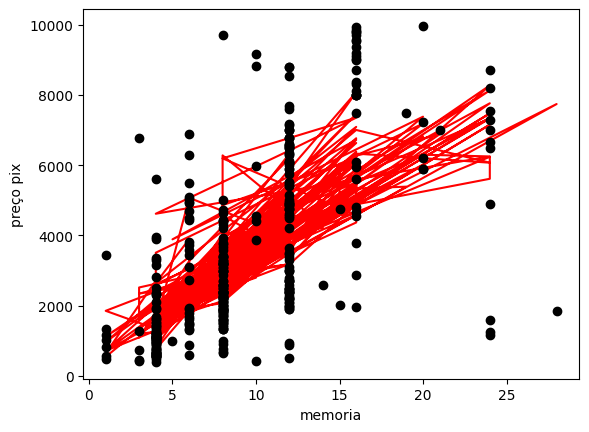

In [278]:
plt.plot(pdva['memoria'], est.predict(),'r', label='predicted')
plt.plot(pdva['memoria'], pdva['preço pix'], 'ko', label='data')
plt.ylabel('preço pix')
plt.xlabel('memoria')

In [266]:
df_data = pd.DataFrame(est.predict())

In [267]:
import numpy as np
df_data.to_csv('resultadoregressao2.csv', index=False)